In [2]:
# 8 features with lable encoding and pre-processing
import pandas as pd
import folium
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
from PIL import Image
import re
#import squarify
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

In [3]:
Train = pd.read_csv("Train14feb2022.csv",encoding='ISO-8859-1')
Test = pd.read_csv("Test14feb2022.csv",encoding='ISO-8859-1')

In [ ]:
#df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

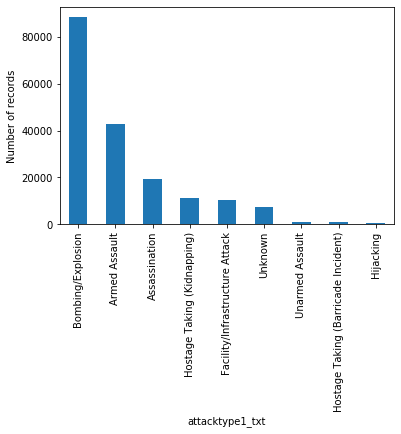

In [ ]:
import matplotlib.pyplot as plt
count = df.attacktype1_txt.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('attacktype1_txt')
plt.show()

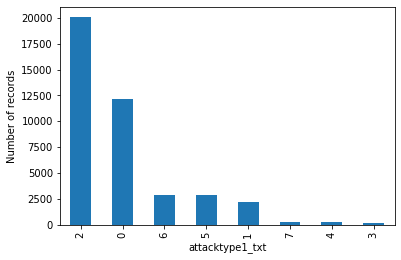

In [ ]:
import matplotlib.pyplot as plt
count = Train.attacktype1_txt.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('attacktype1_txt')
plt.show()

In [ ]:
Train.attacktype1_txt.value_counts()

2    20047
0    12119
6     2860
5     2843
1     2173
7      287
4      255
3      136
Name: attacktype1_txt, dtype: int64

In [ ]:
Train['attacktype1_txt'] = Train['attacktype1_txt'].replace([4],5)
Test['attacktype1_txt'] = Test['attacktype1_txt'].replace([4],5)

In [ ]:
Train['attacktype1_txt'] = Train['attacktype1_txt'].replace([15],4)
Test['attacktype1_txt'] = Test['attacktype1_txt'].replace([15],4)

In [ ]:
Train['attacktype1_txt'] = Train['attacktype1_txt'].replace([16],5)
Test['attacktype1_txt'] = Test['attacktype1_txt'].replace([16],5)

In [ ]:
Train['attacktype1_txt'] = Train['attacktype1_txt'].replace([17],6)
Test['attacktype1_txt'] = Test['attacktype1_txt'].replace([17],6)

In [ ]:
Train.attacktype1_txt.value_counts()

2    20047
0    12119
5     3098
6     2860
1     2173
7      287
3      136
Name: attacktype1_txt, dtype: int64

In [4]:
Train = Train.to_numpy() #this is train set
Test = Test.to_numpy() #this is test set

In [5]:
X_train = Train[:,0:136]
Y_train = Train[:,136]
X_test = Test[:,0:136]
Y_test = Test[:,136]

In [8]:
!pip install scikit-plot

In [9]:
!pip install scikit-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for scikit-metrics: filename=scikit_metrics-0.1.0-py3-none-any.whl size=4394 sha256=d40cb1391786a75a5d92ac6ab7eeeb58bca92638a91b6905507696136286697b
  Stored in directory: /root/.cache/pip/wheels/45/a3/9b/8f375bbf235b0cfbee9a841c94b4bbfb13fad10db9cab4d5d4
Successfully built scikit-metrics


BaggingClassifier


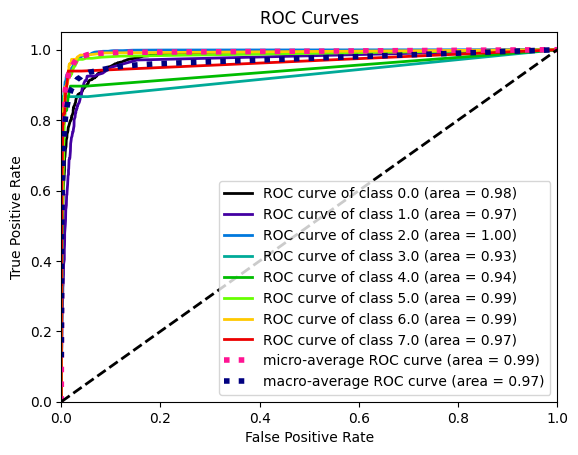

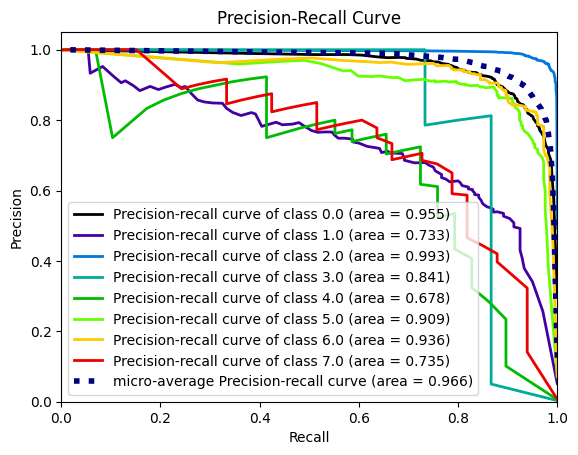

In [10]:
from sklearn.ensemble import BaggingClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("BaggingClassifier")
plot_roc(Y_test, y_score)
plt.show()
#plt.savefig('F:/datapic/persentage/Paper2result/BaggingClassifierROCCurve.png', format='png')
plot_precision_recall(Y_test, y_score)
#plt.savefig('F:/datapic/persentage/Paper2result/BaggingClassifierPrectionCurve.png', format='png')
plt.show()

RandomForestClassifier


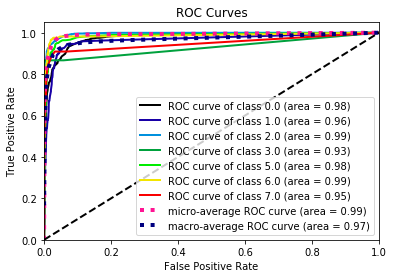

<Figure size 432x288 with 0 Axes>

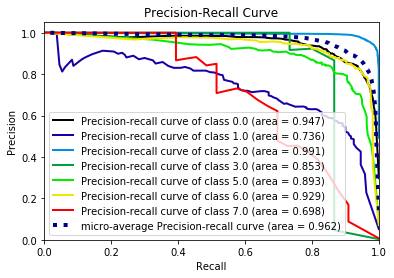

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = RandomForestClassifier()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("RandomForestClassifier")
plot_roc(Y_test, y_score)
plt.show()
plt.savefig('F:/datapic/persentage/Paper2result/RandomforestROCCurve.png', format='png')
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/RandomforestPrectionCurve.png', format='png')
plt.show()


In [ ]:
from sklearn.linear_model import RidgeCV

model = RandomForestClassifier()

model.fit(X_train, Y_train)

print(f'model score on training data: {model.score(X_train, Y_train)}')
print(f'model score on testing data: {model.score(X_test, Y_test)}')

model score on training data: 0.999607072691552
model score on testing data: 0.9040534713238465


In [ ]:
print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
print("Test  Accuracy : %.2f"%gb.score(X_test, Y_test))
print("Train Accuracy : %.2f"%gb.score(X_train, Y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, gb.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, gb.predict(X_test)))

Train/Test Sizes :  (40720, 136) (4638, 136) (40720,) (4638,)
Test  Accuracy : 0.91
Train Accuracy : 0.95

Confusion Matrix : 


NameError: name 'confusion_matrix' is not defined

In [ ]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                              class_names=np.unique(Y_train)
                                             )

explainer

In [ ]:
import random
preds = gb.predict(X_test)

false_preds = np.argwhere((preds != Y_test)).flatten()

idx  = random.choice(false_preds)

print("Prediction : ", [gb.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", [Y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], gb.predict_proba)

explanation.show_in_notebook()

In [ ]:
import random
preds = gb.predict(X_test)

true_preds = np.argwhere((preds == Y_test)).flatten()

idx  = random.choice(true_preds)

print("Prediction : ", [gb.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", [Y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], gb.predict_proba)

explanation.show_in_notebook()

In [ ]:
mylist = []
for i in range(10):
   mylist.append(i)
print(random.choice(mylist))

5


In [ ]:
idx

909

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

[16:27:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBClassifier


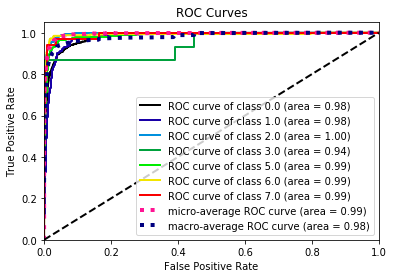

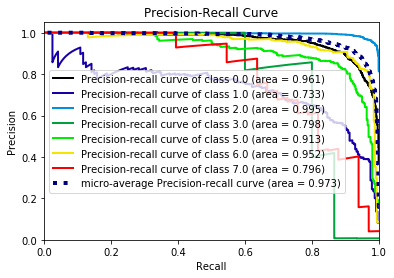

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=400, objective='multi:softmax',
                    silent=True, nthread=1)
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("XGBClassifier")
plot_roc(Y_test, y_score)
plt.show()
plot_precision_recall(Y_test, y_score)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

KNeighborsClassifier


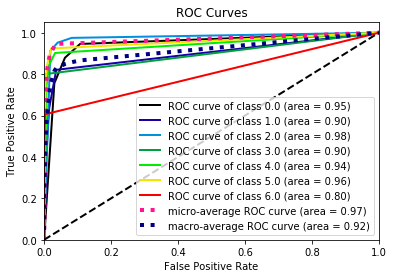

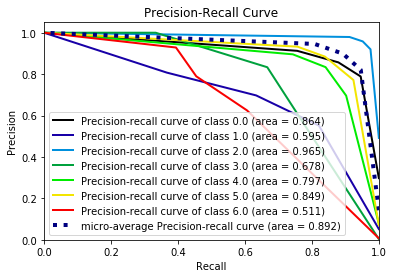

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = KNeighborsClassifier(3)
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("KNeighborsClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/KNeighborsClassifierROCCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/KNeighborsClassifierPrectionCurve.png', format='png')
plt.show()

DecisionTreeClassifier


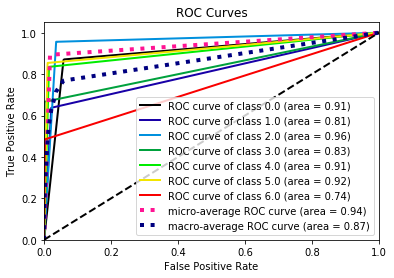

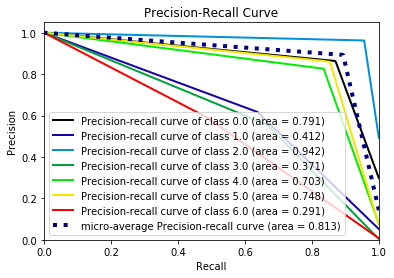

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("DecisionTreeClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/DecisionTreeClassifierROCCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/DecisionTreeClassifierPrectionCurve.png', format='png')
plt.show()

 LogisticRegression


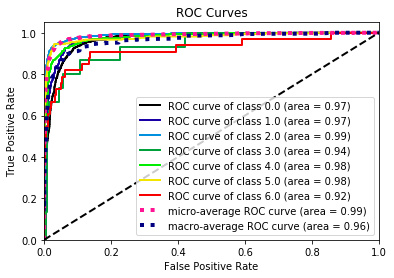

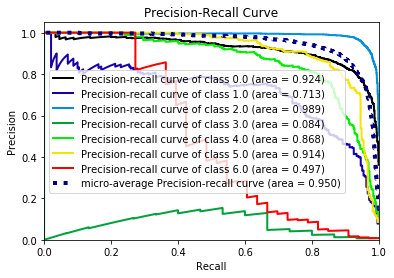

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = LogisticRegression()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" LogisticRegression")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ LogisticRegressionROCCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ LogisticRegressionPrectionCurve.png', format='png')
plt.show()

 QuadraticDiscriminantAnalysis


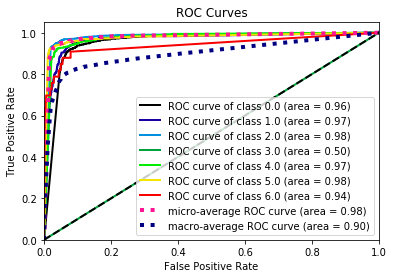

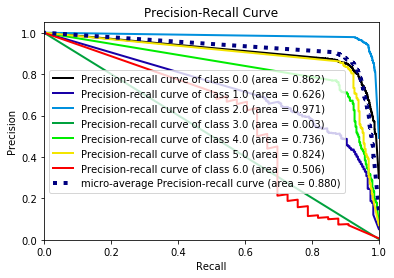

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" QuadraticDiscriminantAnalysis")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/QuadraticDiscriminantAnalysisROCCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/QuadraticDiscriminantAnalysis.png', format='png')
plt.show()

 LinearDiscriminantAnalysis


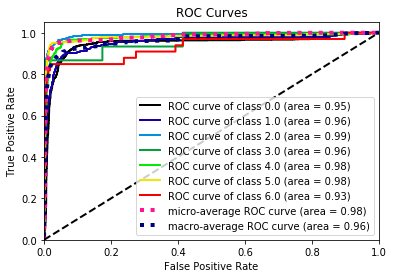

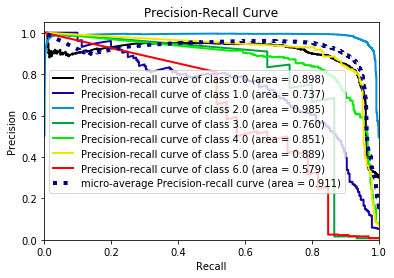

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" LinearDiscriminantAnalysis")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/LDAROCCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/LDAPrectioncurve.png', format='png')
plt.show()

In [ ]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

 AdaBoostClassifier


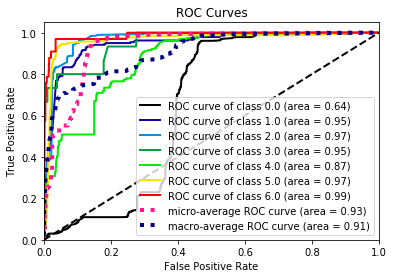

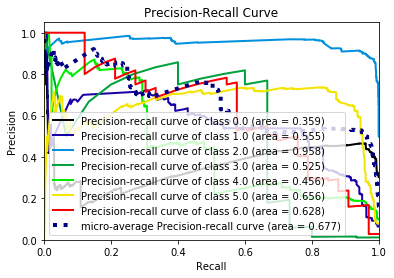

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" AdaBoostClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ABOOSTCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ABOOSTPrectioncurve.png', format='png')
plt.show()

 GradientBoostingClassifier


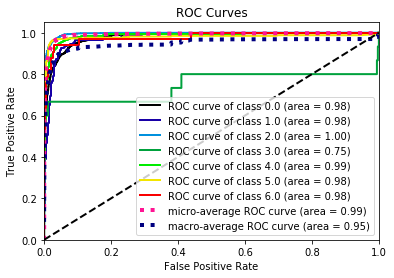

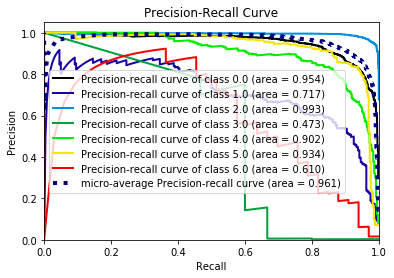

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" GradientBoostingClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/GradientBOOSTCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/GradientBOOSTPrectioncurve.png', format='png')
plt.show()

 LogisticRegressionparameterchange


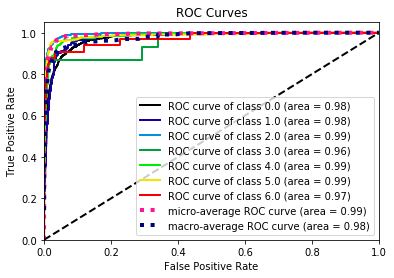

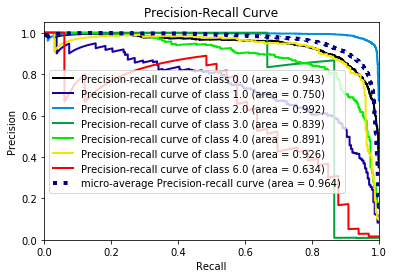

In [ ]:
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print(" LogisticRegressionparameterchange")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/LogisticRegressionParameterchangeCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/LogisticRegressionParameterchangePrectioncurve.png', format='png')
plt.show()

ExtraTreesClassifier


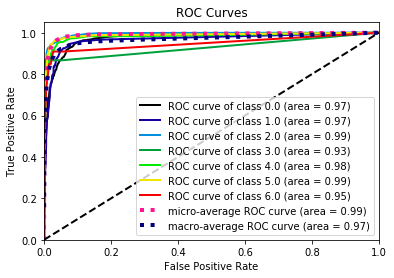

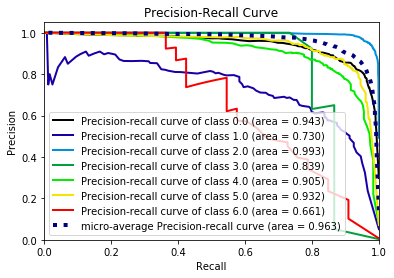

In [ ]:
import pylab as pl
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("ExtraTreesClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ExtraTreesClassifierCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ExtraTreesClassifierPrectioncurve.png', format='png')
plt.show()

ExtraTreeClassifier


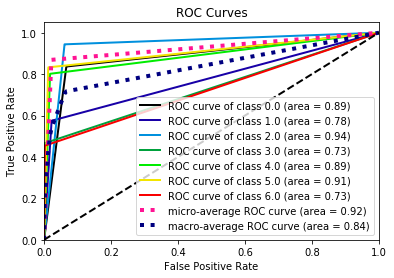

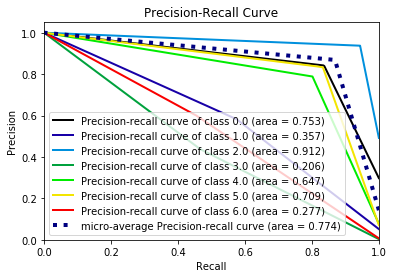

In [ ]:
import pylab as pl
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
dtc = DecisionTreeClassifier(criterion="entropy")
model = ExtraTreeClassifier()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("ExtraTreeClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ExtraTreeClassifierCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/ExtraTreeClassifierPrectioncurve.png', format='png')
plt.show()

OneVsRestClassifier


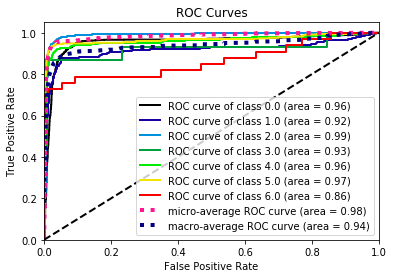

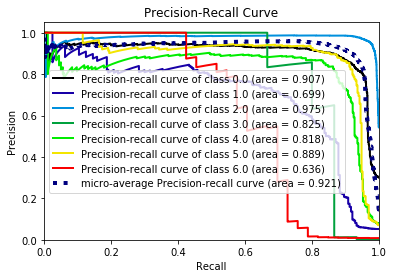

In [ ]:
import pylab as pl
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
model = OneVsRestClassifier(SVC(gamma="auto",probability=True, random_state=42))
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("OneVsRestClassifier")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/OneVsRestClassifierCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/OneVsRestClassifierPrectioncurve.png', format='png')
plt.show()

GaussianNB


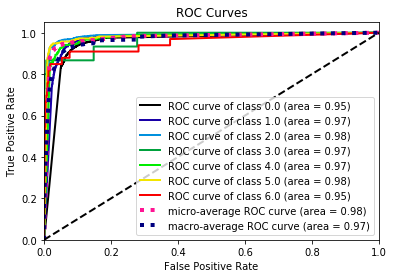

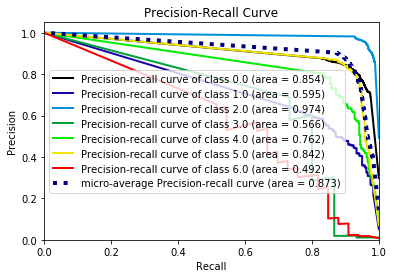

In [ ]:
import pylab as pl
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
model = GaussianNB()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("GaussianNB")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/GaussianNBCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/GaussianNBPrectioncurve.png', format='png')
plt.show()

BernoulliNB


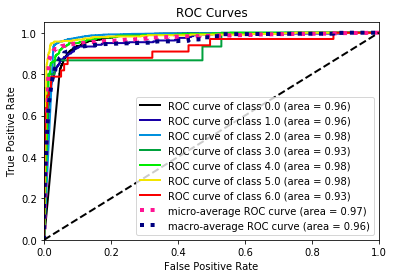

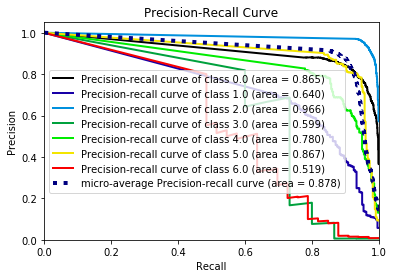

In [ ]:
import pylab as pl
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, Y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics
print("GaussianNB")
plot_roc(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/BernoulliNBCurve.png', format='png')
plt.show()
plot_precision_recall(Y_test, y_score)
plt.savefig('F:/datapic/persentage/Paper2result/BernoulliNBPrectioncurve.png', format='png')
plt.show()

In [ ]:
# 8 features with lable encoding and pre-processing
import pandas as pd
import folium
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
from PIL import Image
import re
import squarify
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

C:\Users\lover\Contacts\anaconda4\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Train2 = pd.read_csv("F:/dataset3/Train14feb2022.csv",encoding='ISO-8859-1')
Test2 = pd.read_csv("F:/dataset3/Test14feb2022.csv",encoding='ISO-8859-1')

In [ ]:
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([4],5)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([4],5)

In [ ]:
Train2.attacktype1_txt.value_counts()

2    20047
0    12119
5     3098
6     2860
1     2173
7      287
3      136
Name: attacktype1_txt, dtype: int64

In [ ]:
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([5],15)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([5],15)
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([6],16)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([6],16)
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([7],17)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([7],17)

In [ ]:
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([15],4)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([15],4)
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([16],5)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([16],5)
Train2['attacktype1_txt'] = Train2['attacktype1_txt'].replace([17],6)
Test2['attacktype1_txt'] = Test2['attacktype1_txt'].replace([17],6)

In [ ]:
Train2.head(5)

iyear  region_txt  nkill  country_txt  ransom      city  weaptype1_txt  \
0   1970   -0.735199    0.0     1.439436     0.0 -1.085613       0.741379   
1   1970   -0.735199    0.0     1.439436     0.0  0.270100       1.533669   
2   1970   -0.735199    0.0     1.439436     0.0  0.270100       1.533669   
3   1970   -0.735199    0.0     1.439436     0.0 -0.822022       1.533669   
4   1970   -0.735199    0.0     1.439436     0.0 -0.815610       1.533669   

      gname      8      9  ...    127    128    129    130    131    132  \
0 -1.410981  0.192 -0.125  ...  0.865  2.946  0.281 -0.169  1.738 -0.168   
1  1.591466  2.736 -0.074  ... -0.168  0.416 -0.163 -0.167  3.546 -0.159   
2  1.591466  2.960 -0.087  ... -0.160  0.630 -0.152 -0.170  3.655 -0.149   
3 -0.126047  2.961 -0.036  ... -0.159  0.952 -0.145 -0.148  3.229 -0.134   
4 -0.126047  2.391 -0.041  ... -0.169  0.442 -0.151 -0.164  3.409 -0.170   

     133    134    135  attacktype1_txt  
0 -0.078 -0.166  0.796                0  
1 -0.169  2.042 -0.002                4  
2 -0.168  1.734 -0.001                4  
3 -0.170  1.447 -0.002                4  
4 -0.075  1.798 -0.001                4  

[5 rows x 137 columns]

In [ ]:
nontextual = Train2.iloc[:, [0,1,2,3,5,6,7,136]]

In [ ]:
nontextual.head(3)

iyear  region_txt  nkill  country_txt      city  weaptype1_txt     gname  \
0   1970   -0.735199    0.0     1.439436 -1.085613       0.741379 -1.410981   
1   1970   -0.735199    0.0     1.439436  0.270100       1.533669  1.591466   
2   1970   -0.735199    0.0     1.439436  0.270100       1.533669  1.591466   

   attacktype1_txt  
0                0  
1                4  
2                4

In [ ]:
Test2nontextual= Test2.iloc[:, [0,1,2,3,5,6,7,136]]

In [ ]:
nontextual = nontextual.to_numpy() #this is train set
Test2nontextual = Test2nontextual.to_numpy() #this is test set

In [ ]:
X_train = nontextual[:,0:7]
Y_train = nontextual[:,7]
X_test = Test2nontextual[:,0:7]
Y_test = Test2nontextual[:,7]

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

 41%|████▏     | 12/29 [48:12<2:54:15, 615.05s/it]